Import Libraries

In [1]:
!pip install proplot

     |████████████████████████████████| 8.0 MB 8.0 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import proplot

/usr/local/lib/python3.7/dist-packages/proplot/internals/__init__.py:9: ProPlotWarning: Unexpected version (0, 0). Interpreting as '0.0'.
  from . import benchmarks, dependencies, docstring, rcsetup, warnings  # noqa: F401
/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:46: ProPlotWarning: Rebuilding font cache.
  register_fonts(default=True)


Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data

/content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data


Read dataset obtained from previous step where utility score is predcited

In [5]:
df=pd.read_csv("Cell_Phones_and_Accessories.csv")

In [6]:
df.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,preProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio,normalized_flesch_index,normalized_polarity_score,normalized_entropy_score,normalized_daleChall_index,utility_score,gradientBoosting_regressor,randomForest_regressor
0,6073894996,"[3, 4]",4.0,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,this is a nice charger but you can tell it was...,0.650000,31.0,0.352083,5.632935,6.568111,0.666667,0.059278,0.013262,0.676042,0.384745,0.393515,0.428571,0.422608,0.420120
1,9861203192,"[25, 25]",5.0,"Bought this for my new AT&T; Galaxy SII, the c...","10 7, 2011",A1847XXVEA8QUK,bought this for my new att galaxy sii the case...,0.562121,34.1,0.266970,5.800280,7.892625,0.966667,0.055556,0.014807,0.633485,0.416500,0.477973,0.500000,0.488521,0.477867
2,9985537742,"[10, 11]",3.0,Works fine IF you don't move the phone. If yo...,"11 19, 2010",A2TOXBTDH3Y6R9,works fine if you dont move the phone if you ...,0.500000,25.1,0.280476,5.381458,7.162129,0.846154,0.068452,0.010320,0.640238,0.337025,0.431393,0.476190,0.474947,0.481599
3,998554627X,"[5, 5]",5.0,was somewhat concerned after reading some of t...,"02 23, 2013",A17X3JUWJY3AXG,was somewhat concerned after reading some of t...,0.575000,16.9,0.375000,5.064869,8.279561,0.857143,0.108696,0.006232,0.687500,0.276950,0.502646,0.500000,0.486851,0.485753


Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group

In [7]:
groupedData=df.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio,normalized_flesch_index,normalized_polarity_score,normalized_entropy_score,normalized_daleChall_index,utility_score,gradientBoosting_regressor,randomForest_regressor
overall,,,,,,,,,,,,,,
1.0,0.484238,59.103723,0.054027,5.775360,7.501782,0.655842,0.064841,0.027273,0.527014,0.411772,0.453051,0.377793,0.390408,0.392701
2.0,0.500586,88.074388,0.114199,6.118482,7.472139,0.682166,0.049249,0.041716,0.557100,0.476882,0.451161,0.385485,0.402988,0.403642
3.0,0.506030,99.715965,0.144617,6.238965,7.432191,0.743456,0.043628,0.047520,0.572309,0.499745,0.448613,0.422706,0.428591,0.429240
4.0,0.518328,119.390755,0.181107,6.392677,7.473809,0.792129,0.039053,0.057329,0.590553,0.528913,0.451267,0.453487,0.450276,0.450383
5.0,0.534129,89.593952,0.238140,6.071549,7.583518,0.791947,0.054920,0.042474,0.619070,0.467976,0.458263,0.458085,0.452905,0.452196


Add column 'overall' to grouped data

In [8]:
groupedData['overall']=[1,2,3,4,5]

Visualize line plot on grouped data for 'utility_score' column vs 'overall' column

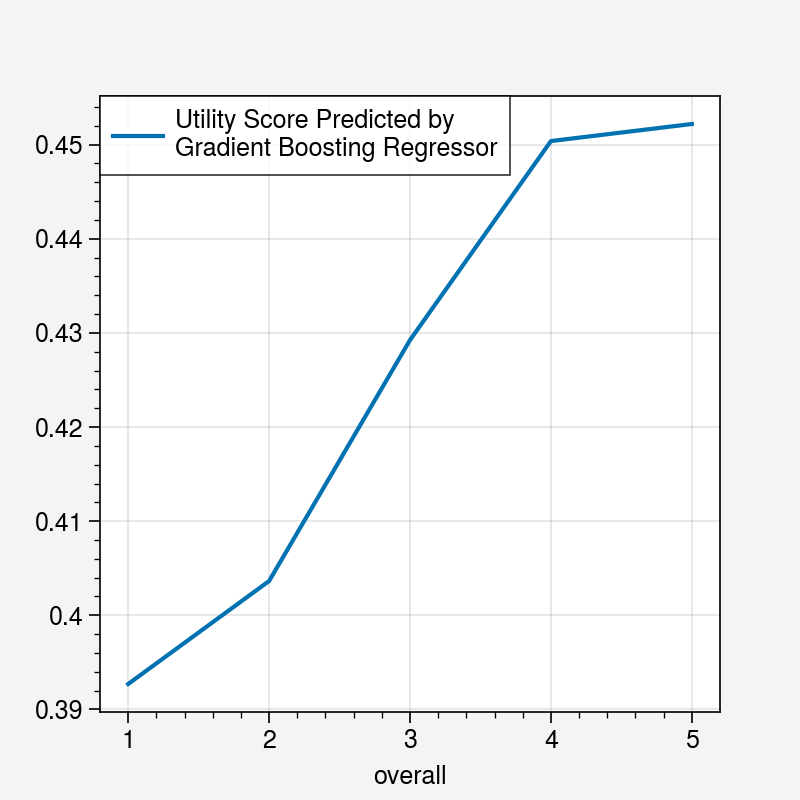

In [9]:
lines=groupedData.plot.line(x='overall',y='randomForest_regressor', label ='Utility Score Predicted by \nRandom Forest Regressor')

Compute covariance between 'overall' and 'randomForest_regressor' columns

In [10]:
covariance = cov(df['overall'].astype(int).values, df['randomForest_regressor'])
print(covariance)

[[2.00913232 0.02998926]
 [0.02998926 0.00419471]]


Compute pearson correlation between 'overall' and 'randomForest_regressor' columns

In [14]:
corr, _ = pearsonr(df['overall'].astype(int).values, df['randomForest_regressor'])
print('Pearsons correlation between rating and randomForest_regressor score is: %.3f' % corr)

Pearsons correlation between rating and randomForest_regressor score is: 0.327


Compute covariance between 'overall' and 'randomForest_regressor' columns

In [12]:
covariance = cov(df['utility_score'], df['randomForest_regressor'])
print(covariance)

[[0.00661935 0.0042808 ]
 [0.0042808  0.00419471]]


In [15]:
corr, _ = pearsonr(df['utility_score'], df['randomForest_regressor'])
print('Pearsons correlation between rating and randomForest_regressor score is: %.3f' % corr)

Pearsons correlation between rating and randomForest_regressor score is: 0.812
